In [527]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [528]:
data  = pd.read_csv("heart.csv")

In [529]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [530]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [531]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [532]:
data.shape

(1025, 14)

In [533]:
print("number of rows",data.shape[0])
print("number of column",data.shape[1])

number of rows 1025
number of column 14


In [534]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [535]:
data.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1021,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1022,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1023,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [536]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [537]:
data_dup = data.duplicated().any()
print(data_dup)

True


In [538]:
data = data.drop_duplicates()

In [539]:
data.shape

(302, 14)

In [540]:
data = data.copy()
data.rename(columns={'sex': 'gender', 'cp': 'chest_pain', 'chol': 'cholesterol', 'ca': 'coronary_artery', 'thal': 'thalassemia', 'target': 'result'}, inplace=True)

In [541]:
data.describe()

,age,gender,chest_pain,trestbps,cholesterol,fbs,restecg,thalach,exang,oldpeak,slope,coronary_artery,thalassemia,result
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [542]:
columns_to_drop = ['exang', 'thalach','restecg']  
data = data.drop(columns=columns_to_drop)


In [543]:

Q1 = data['cholesterol'].quantile(0.25)
Q3 = data['cholesterol'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data[(data['cholesterol'] < lower_bound) | (data['cholesterol'] > upper_bound)]

print("Outliers:")
outliers

Outliers:


,age,gender,chest_pain,trestbps,cholesterol,fbs,oldpeak,slope,coronary_artery,thalassemia,result
123,65,0,2,140,417,1,0.8,2,1,2,1
158,67,0,2,115,564,0,1.6,1,0,3,1
179,56,0,0,134,409,0,1.9,1,2,3,0
255,62,0,0,140,394,0,1.2,1,0,2,1
450,63,0,0,150,407,0,4.0,1,3,3,0


In [544]:
data.corr()

,age,gender,chest_pain,trestbps,cholesterol,fbs,oldpeak,slope,coronary_artery,thalassemia,result
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,0.206040,-0.164124,0.302261,0.065317,-0.221476
gender,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,0.098322,-0.032990,0.113060,0.211452,-0.283609
chest_pain,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,0.194600,-0.122873,0.099248,0.062870,-0.146269
cholesterol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,0.004514,-0.058654,0.144935,-0.032752,-0.026826
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,1.000000,-0.576314,0.236560,0.209090,-0.429146
slope,-0.164124,-0.032990,0.116854,-0.122873,0.000417,-0.058654,-0.576314,1.000000,-0.092236,-0.103314,0.343940
coronary_artery,0.302261,0.113060,-0.195356,0.099248,0.086878,0.144935,0.236560,-0.092236,1.000000,0.160085,-0.408992
thalassemia,0.065317,0.211452,-0.160370,0.062870,0.096810,-0.032752,0.209090,-0.103314,0.160085,1.000000,-0.343101


<Axes: >

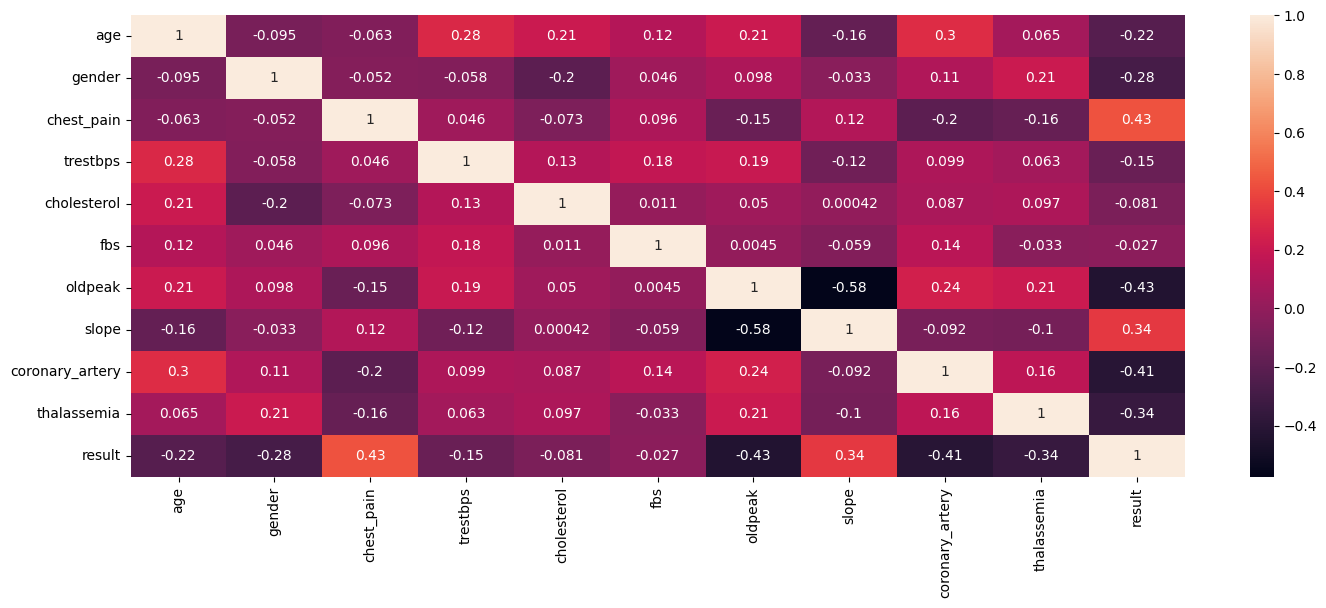

In [545]:
plt.figure(figsize=(17,6))
sns.heatmap(data.corr(),annot=True)

In [546]:
data.columns

Index(['age', 'gender', 'chest_pain', 'trestbps', 'cholesterol', 'fbs',
       'oldpeak', 'slope', 'coronary_artery', 'thalassemia', 'result'],
      dtype='object')

In [547]:
data['result'].value_counts()

result
1    164
0    138
Name: count, dtype: int64

<Axes: xlabel='result', ylabel='count'>

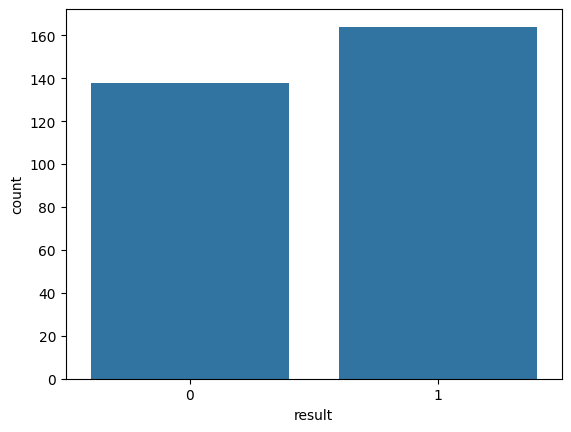

In [548]:
sns.countplot(data=data,x="result")

In [549]:
data.columns

Index(['age', 'gender', 'chest_pain', 'trestbps', 'cholesterol', 'fbs',
       'oldpeak', 'slope', 'coronary_artery', 'thalassemia', 'result'],
      dtype='object')

In [550]:
data['gender'].value_counts()

gender
1    206
0     96
Name: count, dtype: int64

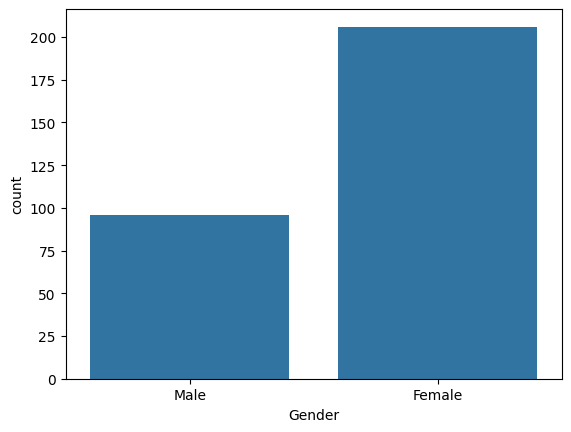

In [551]:
sns.countplot (data=data,x="gender")
plt.xticks([1,0],["Female","Male"])
plt.xlabel("Gender")
plt.show()

In [552]:
data.columns

Index(['age', 'gender', 'chest_pain', 'trestbps', 'cholesterol', 'fbs',
       'oldpeak', 'slope', 'coronary_artery', 'thalassemia', 'result'],
      dtype='object')

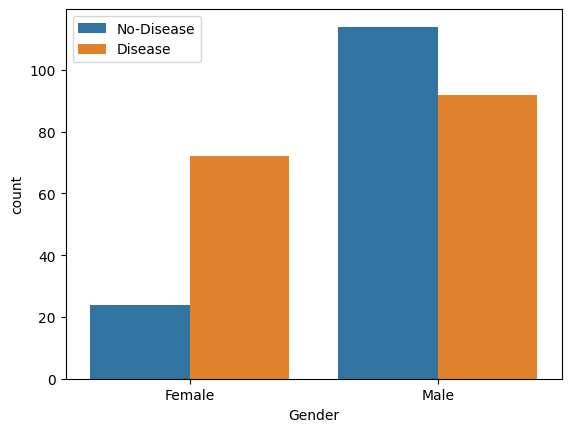

In [553]:
sns.countplot(x='gender' ,hue="result",data=data)
plt.xticks([1,0],['Male','Female'])
plt.legend(labels=['No-Disease','Disease'])
plt.xlabel("Gender")
plt.show()

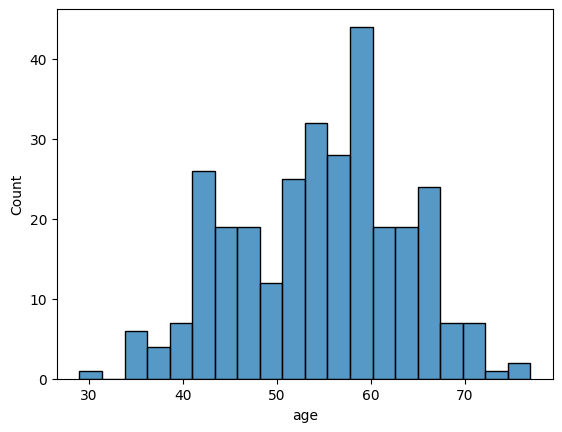

In [554]:
sns.histplot(data['age'], bins=20)
plt.show()

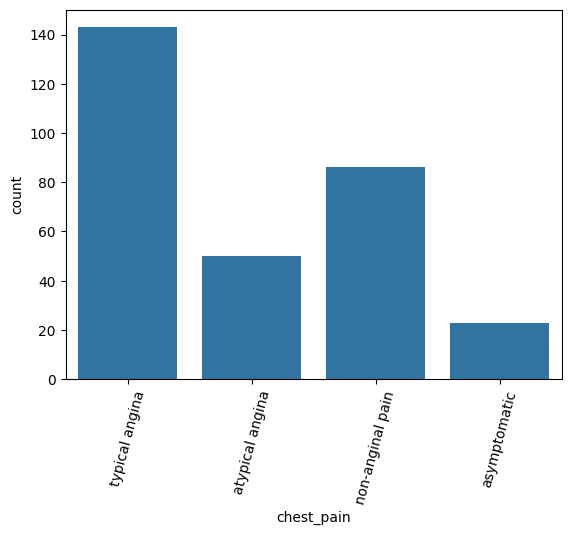

In [555]:
sns.countplot(data=data,x="chest_pain") 
plt.xticks([0,1,2,3],["typical angina","atypical angina","non-anginal pain","asymptomatic"])
plt.xticks(rotation=75)
plt.show()

In [556]:
data.columns

Index(['age', 'gender', 'chest_pain', 'trestbps', 'cholesterol', 'fbs',
       'oldpeak', 'slope', 'coronary_artery', 'thalassemia', 'result'],
      dtype='object')

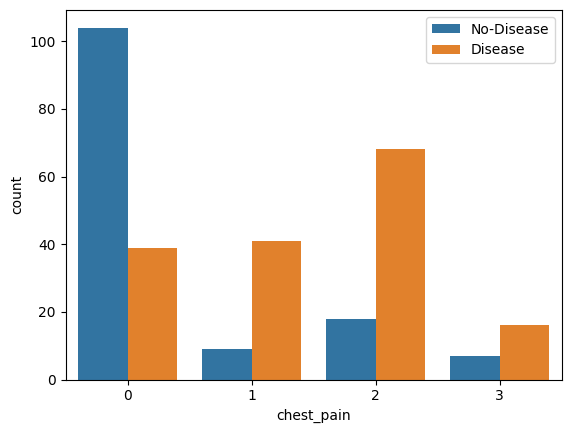

In [557]:
sns.countplot(x="chest_pain",hue="result",data=data)
plt.legend(labels=["No-Disease","Disease"])
plt.show()

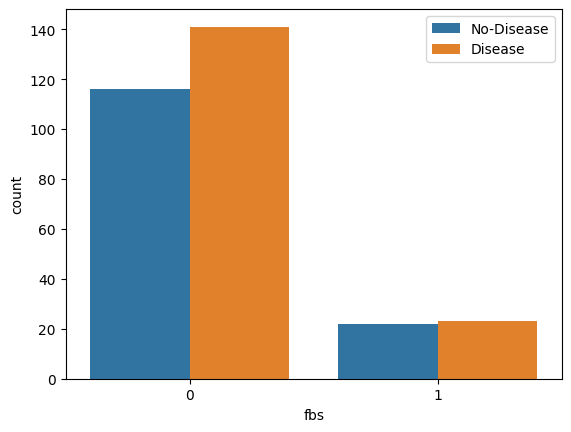

In [558]:
sns.countplot(x="fbs",hue="result",data=data)
plt.legend(labels=["No-Disease","Disease"])
plt.show()

In [559]:
data.columns

Index(['age', 'gender', 'chest_pain', 'trestbps', 'cholesterol', 'fbs',
       'oldpeak', 'slope', 'coronary_artery', 'thalassemia', 'result'],
      dtype='object')

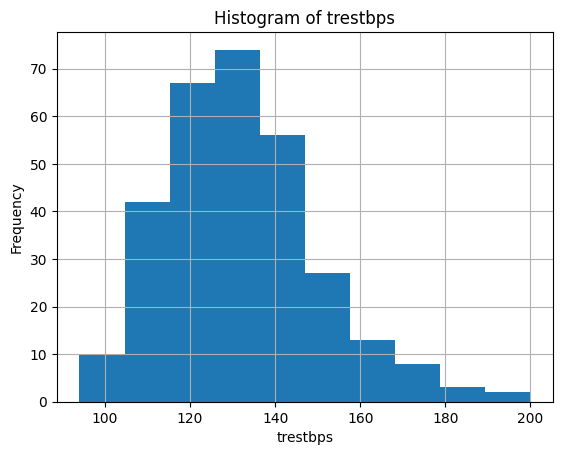

In [569]:

data['trestbps'].hist()
plt.xlabel('trestbps')
plt.ylabel('Frequency')
plt.title('Histogram of trestbps')

plt.show()



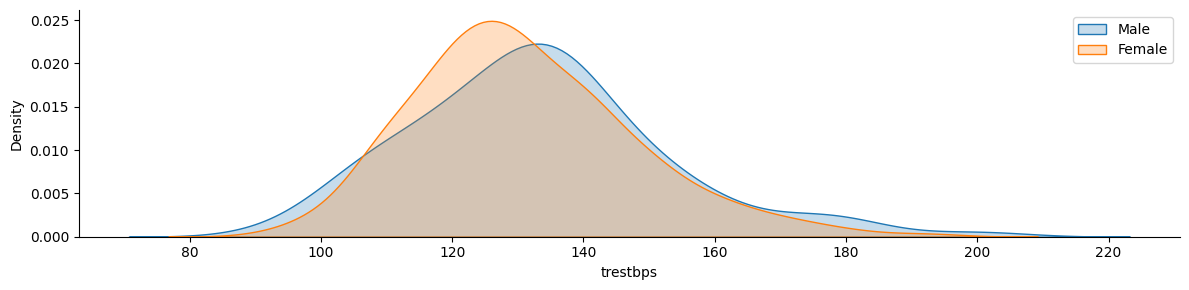

In [561]:
g = sns.FacetGrid(data,hue="gender",aspect=4)
g.map(sns.kdeplot,'trestbps',fill=True)
plt.legend(labels=['Male','Female'])

In [562]:
data.columns

Index(['age', 'gender', 'chest_pain', 'trestbps', 'cholesterol', 'fbs',
       'oldpeak', 'slope', 'coronary_artery', 'thalassemia', 'result'],
      dtype='object')

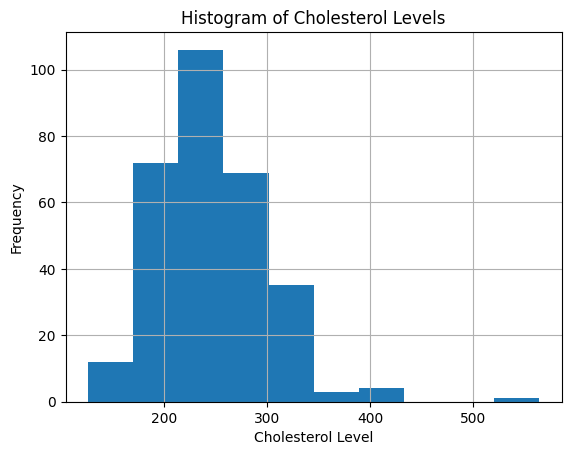

In [570]:

data['cholesterol'].hist()
plt.xlabel('Cholesterol Level')
plt.ylabel('Frequency')
plt.title('Histogram of Cholesterol Levels')

plt.show()



In [564]:
data.columns

Index(['age', 'gender', 'chest_pain', 'trestbps', 'cholesterol', 'fbs',
       'oldpeak', 'slope', 'coronary_artery', 'thalassemia', 'result'],
      dtype='object')

In [565]:
cate_val=[]
cont_val=[]

for column in data.columns:
    if data[column].nunique() <=10:
        cate_val.append(column)
    else:
        cont_val.append(column)
         

In [566]:
cate_val

['gender',
 'chest_pain',
 'fbs',
 'slope',
 'coronary_artery',
 'thalassemia',
 'result']

In [567]:
cont_val

['age', 'trestbps', 'cholesterol', 'oldpeak']

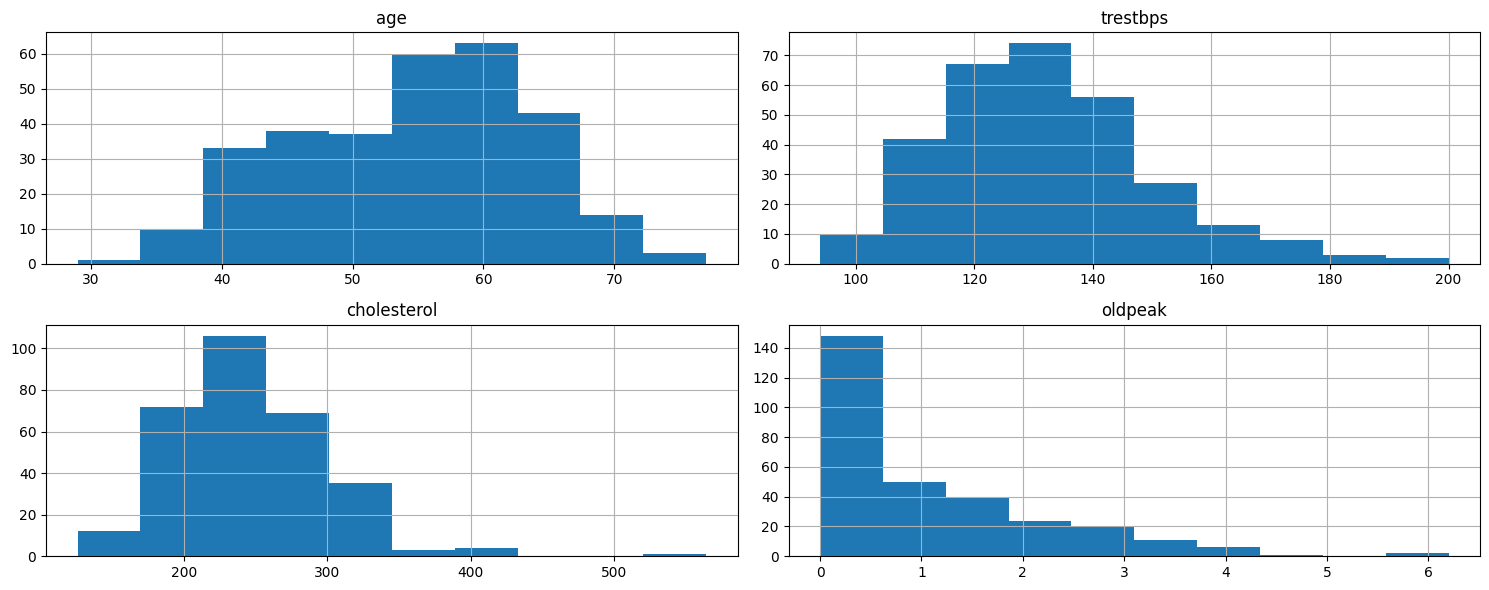

In [568]:
data.hist(cont_val,figsize=(15,6))
plt.tight_layout()
plt.show()